In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('insurance.csv') #Import data

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Encoding Manual, Label, Onehot

In [5]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [6]:
df.sex=df.sex.replace(['female','male'],['0','1']) #Manual Encoding Sex

In [7]:
from sklearn.preprocessing import LabelEncoder  #label Encoding for Smoker

In [8]:
le=LabelEncoder()   

In [9]:
df['smoker']=le.fit_transform(df['smoker'])  

In [10]:
from sklearn.preprocessing import OneHotEncoder           # One Hot Encoder for Region

In [11]:
dummy=pd.get_dummies(df['region'],drop_first=True,prefix='region')

In [12]:
df.drop('region',axis=1,inplace=True)

In [13]:
df=pd.concat([df,dummy],axis=1)

In [14]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


In [15]:
X=df.drop('charges',axis=1)
Y=df[['charges']]

In [16]:
X

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [17]:
Y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


# Split Train and Test Data

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Multiple Regression

In [19]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [20]:
reg.fit(X_train,Y_train)

LinearRegression()

In [21]:
Y_pred=reg.predict(X_test)

In [22]:
print(Y_pred)

[[1.11699271e+04]
 [9.48670909e+03]
 [3.81811231e+04]
 [1.62663133e+04]
 [6.91464801e+03]
 [3.96348488e+03]
 [1.57939691e+03]
 [1.43852566e+04]
 [9.01257970e+03]
 [7.50846068e+03]
 [4.49176728e+03]
 [1.02795839e+04]
 [8.80129751e+03]
 [3.79802013e+03]
 [2.79262010e+04]
 [1.07151158e+04]
 [1.12889756e+04]
 [6.10501768e+03]
 [8.24104117e+03]
 [2.71445089e+04]
 [3.36440910e+04]
 [1.43551043e+04]
 [1.17372043e+04]
 [3.21374335e+04]
 [4.17005913e+03]
 [9.25496051e+03]
 [1.08433751e+03]
 [9.80417085e+03]
 [3.77104596e+03]
 [1.04318587e+04]
 [9.00931722e+03]
 [4.00749509e+04]
 [1.56889543e+04]
 [1.38794545e+04]
 [2.47597127e+04]
 [5.16638285e+03]
 [1.26109277e+04]
 [3.07691018e+04]
 [3.35498325e+04]
 [3.67154946e+03]
 [3.97568613e+03]
 [3.98729942e+03]
 [3.05285774e+04]
 [3.95053023e+04]
 [2.78105036e+04]
 [5.09258923e+03]
 [1.06042481e+04]
 [7.82952256e+03]
 [3.59255553e+03]
 [1.02128745e+04]
 [5.72038147e+03]
 [3.42627499e+03]
 [3.30210242e+04]
 [3.84738218e+04]
 [1.60534782e+04]
 [7.164919

# Accuracy of the Model r2_score
r2 = 1 – (SSres /SSmean ) SSres=(1/n)*sum(Y-Y_pred)

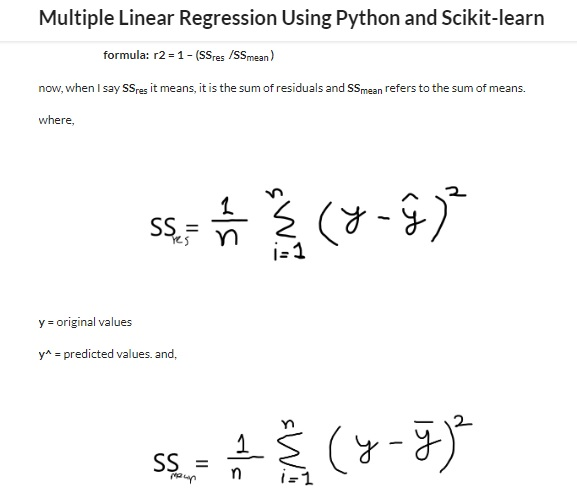

In [23]:
from IPython import display
display.Image('E:\\DSML\\r2_Score formula.jpg')

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [25]:
score=r2_score(Y_test,Y_pred)  #Accuracy of the model
score

0.7999876970680434

# Model Accuracy 80%

In [26]:
print('Mean Squared Error:',mean_squared_error(Y_test,Y_pred))
print('Mean Absolute Error:',mean_absolute_error(Y_test,Y_pred))

Mean Squared Error: 31827950.229523834
Mean Absolute Error: 3933.2726494052367


In [27]:
m=reg.coef_
m

array([[ 2.53700500e+02, -1.54637279e+01,  3.35962814e+02,
         4.36910121e+02,  2.36050173e+04, -2.60132732e+02,
        -9.13278834e+02, -7.61948706e+02]])

In [28]:
c=reg.intercept_
c

array([-11828.07353747])